# image classification using CNN

In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [161]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [162]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [163]:
X_test.shape

(10000, 32, 32, 3)

In [164]:
y_train.shape

(50000, 1)

In [165]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [166]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [167]:
y_test = y_test.reshape(-1,)

In [168]:
classes =['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog','horse', 'ship', 'truck']

In [169]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

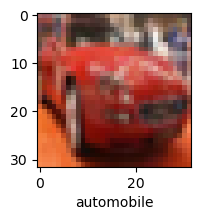

In [170]:
plot_sample(X_train, y_train, 5)

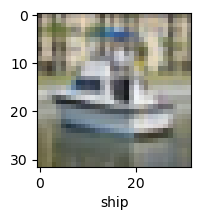

In [171]:
plot_sample(X_train, y_train, 501)

In [172]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [173]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax') 
    ])
    
ann.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.8116 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6209 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5408 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4813 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 66s 43ms/step - loss: 1.4319 - accuracy: 0.4950


In [174]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classifiaction report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 8ms/step
classifiaction report: 
               precision    recall  f1-score   support

           0       0.41      0.70      0.52      1000
           1       0.81      0.26      0.39      1000
           2       0.34      0.42      0.37      1000
           3       0.32      0.30      0.31      1000
           4       0.48      0.27      0.35      1000
           5       0.30      0.51      0.38      1000
           6       0.55      0.43      0.49      1000
           7       0.53      0.55      0.54      1000
           8       0.71      0.42      0.53      1000
           9       0.53      0.58      0.56      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [175]:
cnn = models.Sequential([
     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
     layers.MaxPooling2D((2, 2)),
        
     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
    
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax')
])

In [176]:
cnn.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [177]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4846 - accuracy: 0.4645
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1156 - accuracy: 0.6092
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9854 - accuracy: 0.6570
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8937 - accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8259 - accuracy: 0.7129
Epoch 6/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7718 - accuracy: 0.7304
Epoch 7/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7216 - accuracy: 0.7494
Epoch 8/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6790 - accuracy: 0.7631
Epoch 9/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6341 - accuracy: 0.7788
Epoch 10/10
1563/1563 [==============================] - 16s 11m

In [178]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9040 - accuracy: 0.7048


[0.9039575457572937, 0.704800009727478]

In [179]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.60905030e-03, 9.71930131e-05, 1.60942494e-03, 9.13224280e-01,
        4.89028134e-05, 4.36680727e-02, 9.58966743e-03, 1.26818428e-03,
        2.62972023e-02, 5.87987888e-04],
       [5.49008287e-02, 3.28769267e-01, 1.87685339e-06, 9.06881951e-07,
        3.93897679e-08, 3.94382589e-08, 2.25868320e-08, 6.04508017e-08,
        6.14130557e-01, 2.19640695e-03],
       [7.31051415e-02, 4.05681841e-02, 8.43493384e-04, 5.74524747e-03,
        2.02734969e-04, 2.09421574e-04, 9.78551107e-05, 2.36264910e-04,
        8.42423856e-01, 3.65678072e-02],
       [8.99188519e-01, 1.07797757e-02, 1.57039370e-02, 6.03018270e-04,
        8.95081274e-03, 9.61062597e-06, 6.73169488e-05, 1.54183072e-04,
        5.55285588e-02, 9.01430752e-03],
       [9.19813772e-07, 4.50808272e-07, 1.53375827e-02, 5.92338108e-02,
        1.11188740e-01, 1.10613811e-03, 8.12942266e-01, 7.02257021e-05,
        1.18371754e-04, 1.51078575e-06]], dtype=float32)

In [181]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [182]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

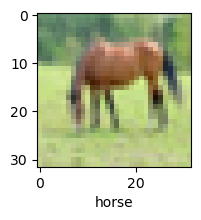

In [183]:
plot_sample(X_test, y_test, 60)

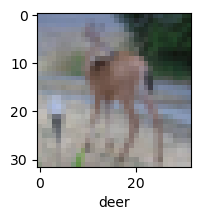

In [184]:
plot_sample(X_test, y_test, 100)

In [185]:
classes[y_classes[60]]

'horse'